## Setup

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

## Get To Know Data

In [76]:
df = pd.read_csv('./data/lsac.csv')

In [77]:
df.head()

,decile1b,decile3,id,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,other,asian,black,hisp,pass_bar,bar,tier,index604,indxgrp,indxgrp2
0,NaN,NaN,1,1.0,1,7,2,30,3.1,-1.79,...,0,0,0,0,,NaN,2,625.78946,e 580-640,e 580-640
1,10.0,10.0,2,10.0,1,7,1,44,3.5,1.33,...,0,0,0,0,1,a Passed 1st time,4,886.842082,g 700+,i 820+
2,5.0,4.0,3,5.0,1,7,2,29,3.5,-0.11,...,0,0,0,0,1,a Passed 1st time,2,649.9999869999999,f 640-700,f 640-700
3,9.0,9.0,4,9.0,1,7,3,35,3,1.22,...,0,0,0,0,,d Never took bar,3,694.736825,f 640-700,f 640-700
4,NaN,NaN,5,9.0,1,7,2,39,2.9,0.88,...,0,0,0,0,,NaN,2,747.8947169999999,g 700+,g 700-760


In [78]:
df.columns

Index(['decile1b', 'decile3', 'id', 'decile1', 'sex', 'race', 'cluster',
       'lsat', 'ugpa', 'zfygpa', 'dob_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr',
       'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime',
       'male', 'race1', 'race2', 'dropout', 'other', 'asian', 'black', 'hisp',
       'pass_bar', 'bar', 'tier', 'index604', 'indxgrp', 'indxgrp2'],
      dtype='object')

In [79]:
df.shape

(27478, 36)

## Filter

In [80]:
# Apply the filters
for col in df.columns:
    df = df[~df[col].isin(["", " "])]

## Duplicates & Null Values

In [81]:
idsUnique = df['id'].nunique()
idsTotal = df.shape[0]
idd = idsTotal - idsUnique

print('Number of duplicate IDs:', idd)

Number of duplicate IDs: 0


In [82]:
df.isnull().sum()

decile1b    0
decile3     0
id          0
decile1     0
sex         0
race        0
cluster     0
lsat        0
ugpa        0
zfygpa      0
dob_yr      0
grad        0
zgpa        0
bar1        0
bar1_yr     0
bar2        0
bar2_yr     0
fulltime    0
fam_inc     0
age         0
gender      0
parttime    0
male        0
race1       0
race2       0
dropout     0
other       0
asian       0
black       0
hisp        0
pass_bar    0
bar         0
tier        0
index604    0
indxgrp     0
indxgrp2    0
dtype: int64

In [83]:
df['bar'].unique()

array(['a Passed 1st time', 'b Passed 2nd time', 'c Failed'], dtype=object)

Text(0.5, 1.0, 'Pass Bar')

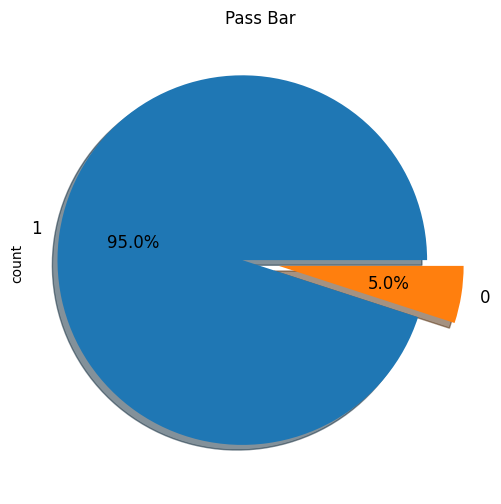

In [84]:
plt.figure(figsize=(6,6))

df['pass_bar'].value_counts().plot.pie(explode = [.1,.1], autopct='%1.1f%%', shadow=True, fontsize=12).set_title('Pass Bar')

In [85]:
df['sex'].value_counts()

sex
2    11675
1     9123
Name: count, dtype: int64

In [86]:
df['gender'].value_counts()

gender
male      11675
female     9123
Name: count, dtype: int64

In [87]:
df.drop(['sex'], axis=1, inplace=True)

In [88]:
df['indxgrp'].value_counts()

indxgrp
g 700+         14205
f 640-700       3564
e 580-640       1811
d 520-580        737
c 460-520        337
b 400-460        110
a under 400       34
Name: count, dtype: int64

In [89]:
df['indxgrp2'].value_counts()

indxgrp2
i 820+         4902
g 700-760      4798
h 760-820      4505
f 640-700      3564
e 580-640      1811
d 520-580       737
c 460-520       337
b 400-460       110
a under 400      34
Name: count, dtype: int64

In [90]:
df['index604'].value_counts().sort_index()

index604
288.947365             2
315.789473             1
321.578946             1
325.26315550000004     1
333.1578881            1
                      ..
974.210501            27
979.999974            28
984.210501            15
989.999974            19
999.999974            11
Name: count, Length: 1167, dtype: int64

In [91]:
df['dropout'].value_counts()

dropout
NO    20798
Name: count, dtype: int64

In [92]:
df.drop(['dropout'], axis=1, inplace=True)

## Encoding

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20798 entries, 1 to 27476
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   decile1b  20798 non-null  float64
 1   decile3   20798 non-null  float64
 2   id        20798 non-null  int64  
 3   decile1   20798 non-null  float64
 4   race      20798 non-null  object 
 5   cluster   20798 non-null  object 
 6   lsat      20798 non-null  object 
 7   ugpa      20798 non-null  object 
 8   zfygpa    20798 non-null  object 
 9   dob_yr    20798 non-null  object 
 10  grad      20798 non-null  object 
 11  zgpa      20798 non-null  object 
 12  bar1      20798 non-null  object 
 13  bar1_yr   20798 non-null  object 
 14  bar2      20798 non-null  object 
 15  bar2_yr   20798 non-null  object 
 16  fulltime  20798 non-null  object 
 17  fam_inc   20798 non-null  object 
 18  age       20798 non-null  object 
 19  gender    20798 non-null  object 
 20  parttime  20798 non-null  object 

In [94]:
# Mapping for 'grad'
df['grad'] = df['grad'].map({'N': 0, 'O': 1, 'X': 2, 'Y': 3})

# Mapping for 'indxgrp2'
indxgrp2_mapping = {
    'a under 400': 0, 'b 400-460': 1, 'c 460-520': 2, 'd 520-580': 3,
    'e 580-640': 4, 'f 640-700': 5, 'g 700-760': 6, 'h 760-820': 7, 'i 820+': 8
}

df['indxgrp2'] = df['indxgrp2'].map(indxgrp2_mapping)

# Mapping for 'pass_bar' (assuming 'pass_bar' is your target variable)
df['pass_bar'] = df['pass_bar'].map({'0': 0, '1': 1, '': 0})

In [95]:
df.replace({'gender': 'male'}, 1, inplace = True)
df.replace({'gender': 'female'}, 0, inplace = True)

C:\Users\ilham\AppData\Local\Temp\ipykernel_5396\2596468903.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'gender': 'female'}, 0, inplace = True)


In [96]:
df['gender'].unique()

array([0, 1], dtype=int64)

In [97]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Attempt to convert object columns to numeric
for col in categorical_cols:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        print(f"Column '{col}' cannot be converted to numeric.")

Column 'bar1' cannot be converted to numeric.
Column 'bar2' cannot be converted to numeric.
Column 'race1' cannot be converted to numeric.
Column 'race2' cannot be converted to numeric.
Column 'bar' cannot be converted to numeric.
Column 'indxgrp' cannot be converted to numeric.


In [98]:
df['bar2'].value_counts()

bar2
P    19758
F     1040
Name: count, dtype: int64

In [99]:
catvar = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] # Categorical Variable

for cat in catvar:
    df[cat] = LabelEncoder().fit_transform(df[cat])

In [100]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [101]:
print(categorical_cols)

Index([], dtype='object')


## High Correlations

In [102]:
df_gpa = df[['ugpa', 'zgpa', 'zfygpa', 'pass_bar']]

In [103]:
df_gpa.describe()

,ugpa,zgpa,zfygpa,pass_bar
count,20798.000000,20798.000000,20798.000000,20798.000000
mean,3.226810,0.024189,0.097801,0.949995
std,0.411421,0.988012,0.929575,0.217960
min,1.500000,-6.440000,-3.350000,0.000000
25%,3.000000,-0.670000,-0.550000,1.000000
50%,3.300000,0.020000,0.090000,1.000000
75%,3.500000,0.710000,0.750000,1.000000
max,4.000000,4.010000,3.480000,1.000000


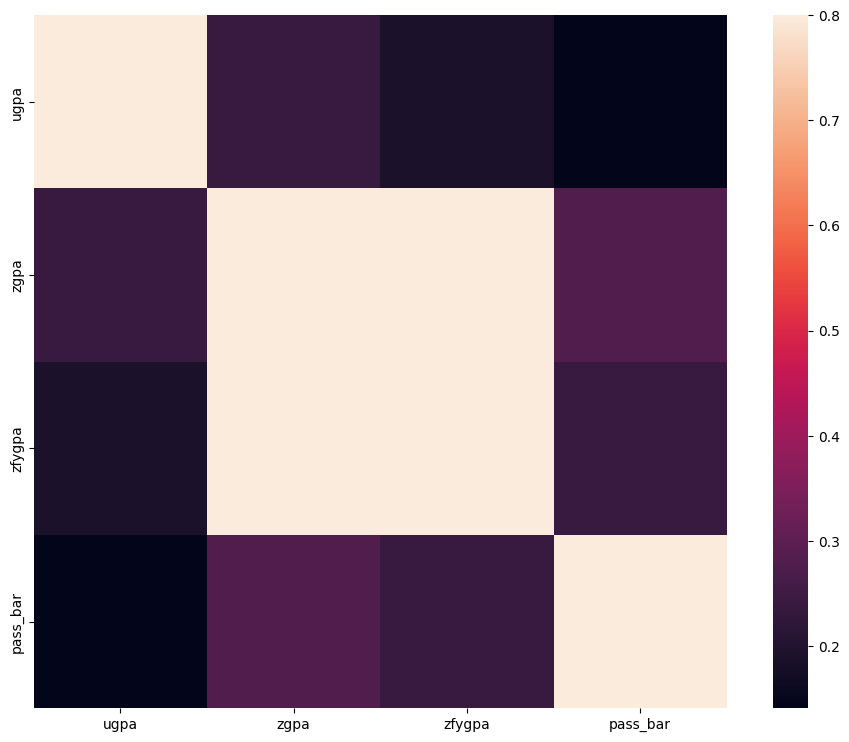

In [104]:
corrmat = df_gpa.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [105]:
df_gpa.isnull().sum()

ugpa        0
zgpa        0
zfygpa      0
pass_bar    0
dtype: int64

In [106]:
corrmat

,ugpa,zgpa,zfygpa,pass_bar
ugpa,1.000000,0.239642,0.189303,0.140800
zgpa,0.239642,1.000000,0.873836,0.277954
zfygpa,0.189303,0.873836,1.000000,0.240997
pass_bar,0.140800,0.277954,0.240997,1.000000


In [107]:
corrmat = df.corr().abs()

upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [108]:
print(to_drop)

['decile1', 'zfygpa', 'zgpa', 'parttime', 'male', 'pass_bar', 'indxgrp2']


In [109]:
df = df.drop(['parttime', 'male'], axis = 1)

In [110]:
corrmat['gender'].sort_values(ascending = False)

gender      1.000000
male        1.000000
ugpa        0.137357
black       0.092293
lsat        0.080294
race1       0.080053
race        0.076168
fam_inc     0.048948
decile1b    0.042115
decile1     0.041564
race2       0.040329
zfygpa      0.039697
bar1        0.033468
bar         0.033407
dob_yr      0.030257
age         0.028843
bar2_yr     0.027639
pass_bar    0.026143
bar2        0.026143
asian       0.024396
cluster     0.021718
parttime    0.013271
fulltime    0.013271
index604    0.011453
indxgrp     0.011334
tier        0.011083
indxgrp2    0.008056
hisp        0.007057
decile3     0.005527
other       0.003488
bar1_yr     0.002740
zgpa        0.002364
id          0.000458
grad             NaN
Name: gender, dtype: float64

In [111]:
corrmat['zgpa'].sort_values(ascending = False)[:5]

zgpa        1.000000
decile3     0.974432
zfygpa      0.873836
decile1b    0.857864
decile1     0.857656
Name: zgpa, dtype: float64

In [112]:
corrmat['zfygpa'].sort_values(ascending = False)[:5]

zfygpa      1.000000
decile1     0.974171
decile1b    0.971998
zgpa        0.873836
decile3     0.854194
Name: zfygpa, dtype: float64

In [113]:
corrmat['indxgrp2'].sort_values(ascending = False)[:5]

indxgrp2    1.000000
index604    0.966616
lsat        0.891658
indxgrp     0.882180
ugpa        0.574096
Name: indxgrp2, dtype: float64

### Deciles, zgpa, zfygpa

In [114]:
df_dec = df[['decile1b', 'decile1', 'zfygpa', 'decile3', 'zgpa']]

In [115]:
df_dec.head()

,decile1b,decile1,zfygpa,decile3,zgpa
1,10.0,10.0,1.33,10.0,1.88
2,5.0,5.0,-0.11,4.0,-0.57
5,8.0,8.0,0.63,7.0,0.37
6,8.0,8.0,0.67,7.0,0.34
8,3.0,3.0,-0.67,2.0,-1.30


In [116]:
df_dec.describe()

,decile1b,decile1,zfygpa,decile3,zgpa
count,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000
mean,5.562987,5.746754,0.097801,5.565054,0.024189
std,2.857880,2.780395,0.929575,2.857732,0.988012
min,1.000000,1.000000,-3.350000,1.000000,-6.440000
25%,3.000000,3.000000,-0.550000,3.000000,-0.670000
50%,6.000000,6.000000,0.090000,6.000000,0.020000
75%,8.000000,8.000000,0.750000,8.000000,0.710000
max,10.000000,10.000000,3.480000,10.000000,4.010000


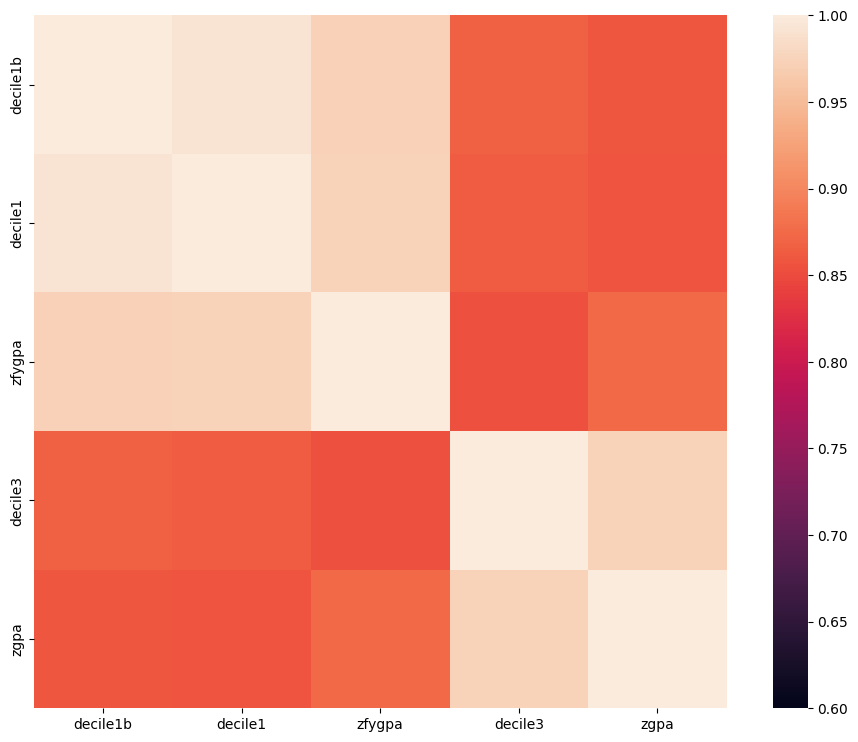

In [117]:
corrmat = df_dec.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, vmin=.6, square=True);

In [118]:
corrmat['decile1'].sort_values(ascending = False)

decile1     1.000000
decile1b    0.990915
zfygpa      0.974171
decile3     0.864002
zgpa        0.857656
Name: decile1, dtype: float64

In [119]:
corrmat['decile3'].sort_values(ascending = False)

decile3     1.000000
zgpa        0.974432
decile1b    0.865626
decile1     0.864002
zfygpa      0.854194
Name: decile3, dtype: float64

In [120]:
df_dec.isnull().sum()

decile1b    0
decile1     0
zfygpa      0
decile3     0
zgpa        0
dtype: int64

In [121]:
df = df.drop('decile1b', axis=1)

In [122]:
df = df.drop(['zfygpa', 'zgpa'], axis = 1)

In [123]:
df.columns

Index(['decile3', 'id', 'decile1', 'race', 'cluster', 'lsat', 'ugpa', 'dob_yr',
       'grad', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc',
       'age', 'gender', 'race1', 'race2', 'other', 'asian', 'black', 'hisp',
       'pass_bar', 'bar', 'tier', 'index604', 'indxgrp', 'indxgrp2'],
      dtype='object')

### DOB_yr & age

In [124]:
df_age = df[['dob_yr', 'age']]

In [125]:
df_age.head()

,dob_yr,age
1,69,-62
2,69,-62
5,68,-61
6,67,-60
8,64,-57


In [126]:
df_age.describe()

,dob_yr,age
count,20798.000000,20798.000000
mean,65.475959,-59.111838
std,5.175710,5.272084
min,10.000000,-69.000000
25%,64.000000,-62.000000
50%,67.000000,-61.000000
75%,69.000000,-58.000000
max,71.000000,-3.000000


In [127]:
df_age = df[['dob_yr', 'age', 'pass_bar']]

<Axes: >

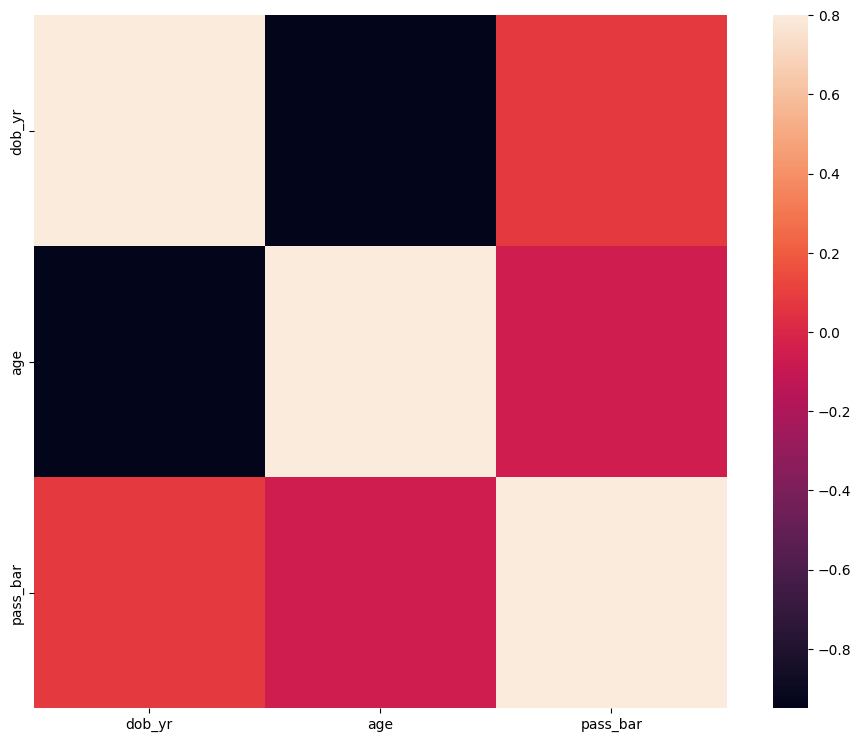

In [128]:
corrmat = df_age.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [129]:
corrmat['pass_bar']

dob_yr      0.082264
age        -0.058554
pass_bar    1.000000
Name: pass_bar, dtype: float64

In [130]:
corrmat['age']

dob_yr     -0.949803
age         1.000000
pass_bar   -0.058554
Name: age, dtype: float64

In [131]:
df = df.drop(['age'], axis = 1)

### ID

In [132]:
df['id'].describe()

count    20798.000000
mean     13729.160304
std       7933.566277
min          2.000000
25%       6887.250000
50%      13703.000000
75%      20601.500000
max      27477.000000
Name: id, dtype: float64

In [133]:
df[df['id'].duplicated()]

,decile3,id,decile1,race,cluster,lsat,ugpa,dob_yr,grad,bar1,...,other,asian,black,hisp,pass_bar,bar,tier,index604,indxgrp,indxgrp2


In [134]:
df = df.drop('id', axis =1)

### cluster

In [135]:
df['cluster'].describe()

count    20798.000000
mean         2.750745
std          1.342702
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: cluster, dtype: float64

<Axes: >

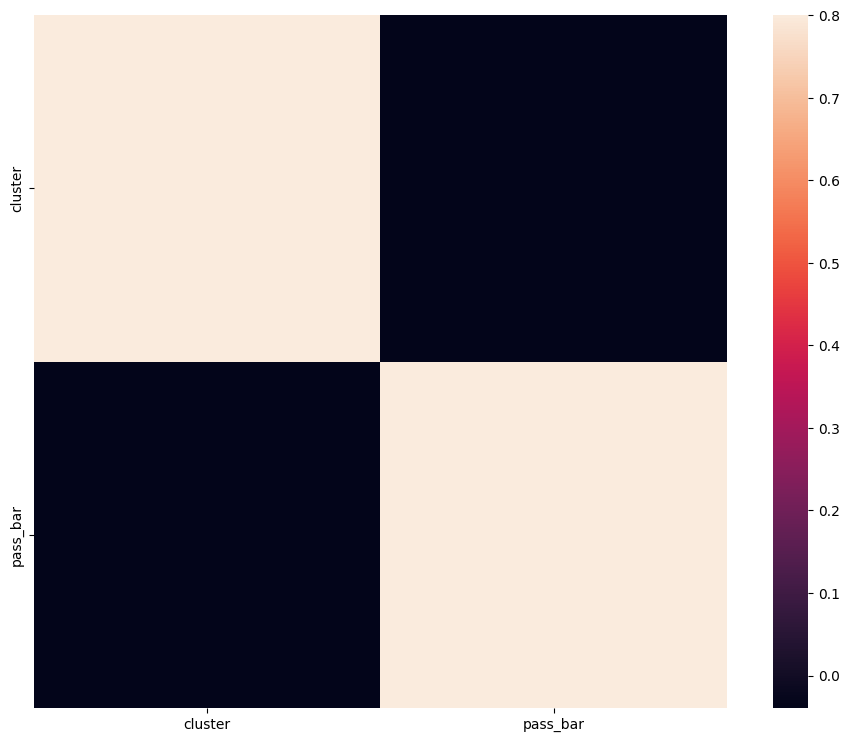

In [136]:
corrmat = df[['cluster','pass_bar']].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

### bar1, bar1_yr, bar2, bar2_yr and bar

In [137]:
df_bars = df[['bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'bar', 'pass_bar']]

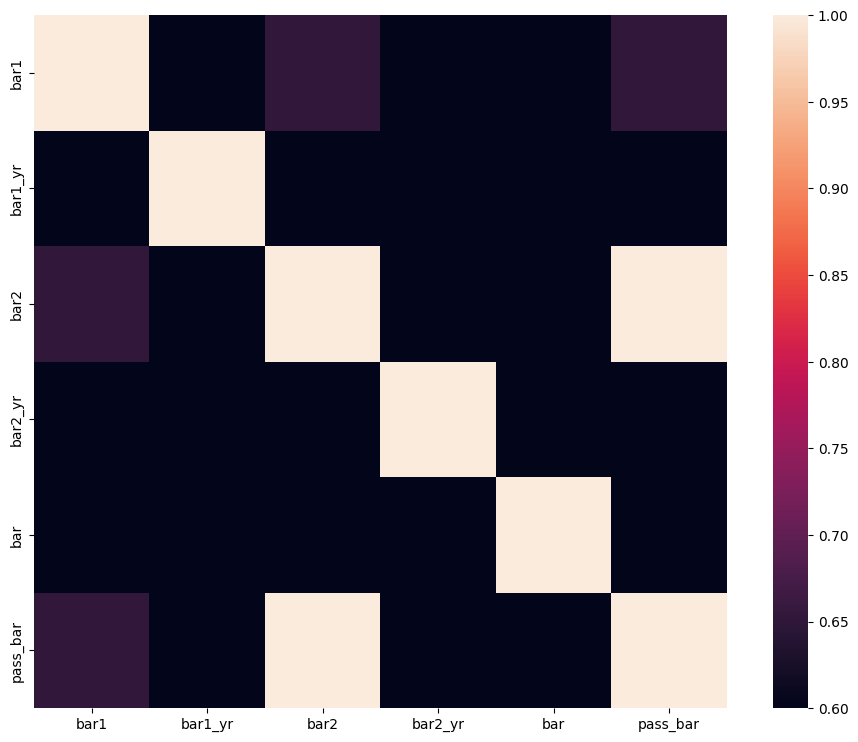

In [138]:
corrmat = df_bars.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, vmin=.6, square=True);

In [139]:
corrmat['bar1']

bar1        1.000000
bar1_yr     0.041107
bar2        0.651760
bar2_yr    -0.476323
bar        -0.939956
pass_bar    0.651760
Name: bar1, dtype: float64

In [140]:
corrmat['bar1_yr']

bar1        0.041107
bar1_yr     1.000000
bar2        0.070614
bar2_yr    -0.420647
bar        -0.058359
pass_bar    0.070614
Name: bar1_yr, dtype: float64

In [141]:
corrmat['bar2_yr']

bar1       -0.476323
bar1_yr    -0.420647
bar2       -0.129560
bar2_yr     1.000000
bar         0.366322
pass_bar   -0.129560
Name: bar2_yr, dtype: float64

In [142]:
corrmat['bar2']

bar1        0.651760
bar1_yr     0.070614
bar2        1.000000
bar2_yr    -0.129560
bar        -0.871473
pass_bar    1.000000
Name: bar2, dtype: float64

In [143]:
corrmat['bar']

bar1       -0.939956
bar1_yr    -0.058359
bar2       -0.871473
bar2_yr     0.366322
bar         1.000000
pass_bar   -0.871473
Name: bar, dtype: float64

In [144]:
df = df.drop(['bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'bar'], axis = 1)

In [145]:
len(df.columns)

22

### index604, indxgrp, indxgrp2

In [146]:
df_idx = df[['index604', 'indxgrp', 'indxgrp2','pass_bar']]
df_idx.describe()

,index604,indxgrp,indxgrp2,pass_bar
count,20798.000000,20798.000000,20798.000000,20798.000000
mean,745.250537,5.447110,6.135109,0.949995
std,102.897937,0.991606,1.558902,0.217960
min,288.947365,0.000000,0.000000,0.000000
25%,680.526298,5.000000,5.000000,1.000000
50%,747.894717,6.000000,6.000000,1.000000
75%,815.263136,6.000000,7.000000,1.000000
max,999.999974,6.000000,8.000000,1.000000


In [147]:
df_idx.head()

,index604,indxgrp,indxgrp2,pass_bar
1,886.842082,6,8,1
2,649.999987,5,5,1
5,766.315771,6,7,1
6,851.052609,6,8,1
8,819.473663,6,7,1


<Axes: >

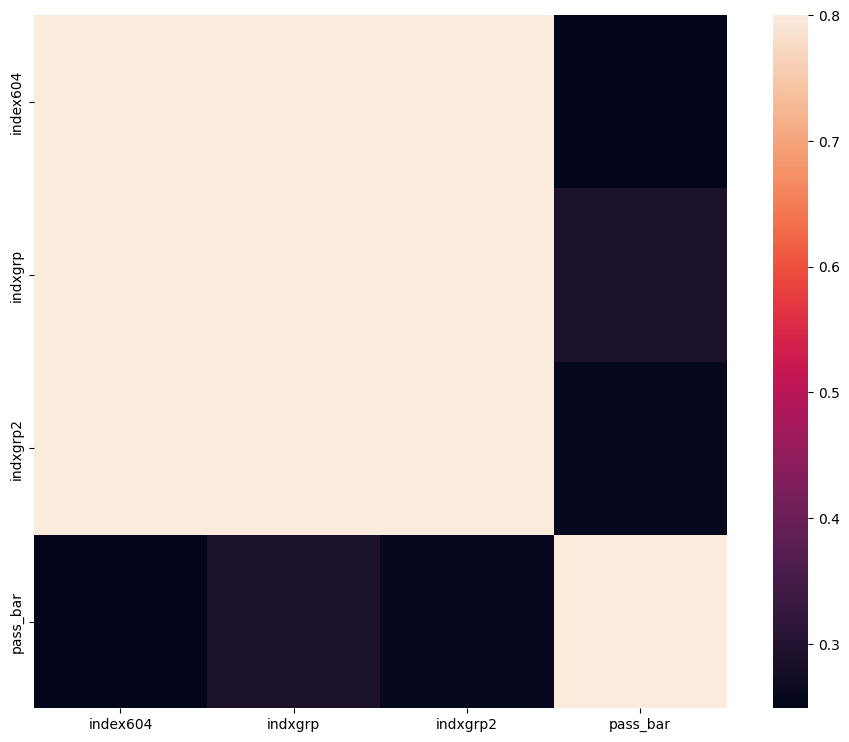

In [148]:
corrmat = df_idx.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [149]:
corrmat['index604']

index604    1.000000
indxgrp     0.820966
indxgrp2    0.966616
pass_bar    0.248692
Name: index604, dtype: float64

In [150]:
corrmat['indxgrp']

index604    0.820966
indxgrp     1.000000
indxgrp2    0.882180
pass_bar    0.287660
Name: indxgrp, dtype: float64

In [151]:
corrmat['indxgrp2']

index604    0.966616
indxgrp     0.882180
indxgrp2    1.000000
pass_bar    0.258904
Name: indxgrp2, dtype: float64

In [152]:
df['indxgrp'].value_counts()

indxgrp
6    14205
5     3564
4     1811
3      737
2      337
1      110
0       34
Name: count, dtype: int64

In [153]:
df['indxgrp2'].value_counts()

indxgrp2
8    4902
6    4798
7    4505
5    3564
4    1811
3     737
2     337
1     110
0      34
Name: count, dtype: int64

In [154]:
df = df.drop(['index604'], axis = 1)

### tier

In [155]:
df['tier'].unique()

array([4, 2, 5, 3, 1, 6], dtype=int64)

In [156]:
df['tier'].value_counts()

tier
3    7653
4    5819
5    3752
2    1641
6    1456
1     477
Name: count, dtype: int64

### fam_inc

In [157]:
df['fam_inc'].value_counts()

fam_inc
4    9178
3    7469
2    2037
5    1693
1     421
Name: count, dtype: int64

In [158]:
df_fam_inc = pd.DataFrame(columns=['score', 'total', 'passed', 'per_passed'])

### grad

In [159]:
df['grad'].value_counts()

grad
3    20798
Name: count, dtype: int64

In [160]:
df.drop(['grad'], axis=1, inplace=True)

### fulltime

In [161]:
df['fulltime'].unique()

array([1, 2], dtype=int64)

In [162]:
df['fulltime'].value_counts()

fulltime
1    19290
2     1508
Name: count, dtype: int64

In [163]:
df['fulltime'] = df['fulltime'].replace(2, 0)

In [164]:
df.columns

Index(['decile3', 'decile1', 'race', 'cluster', 'lsat', 'ugpa', 'dob_yr',
       'fulltime', 'fam_inc', 'gender', 'race1', 'race2', 'other', 'asian',
       'black', 'hisp', 'pass_bar', 'tier', 'indxgrp', 'indxgrp2'],
      dtype='object')

### Races

In [165]:
df.drop(['race1', 'race2', 'other', 'asian', 'black', 'hisp'], axis=1, inplace=True)

In [166]:
df['race'].value_counts()

race
7    17491
3     1201
2      795
6      461
4      370
8      280
5      102
1       98
Name: count, dtype: int64

In [167]:
df['race'] = df['race'].isin([4, 5, 6]).astype(int)

In [168]:
df['race'].value_counts()

race
0    19865
1      933
Name: count, dtype: int64


### More Preprocessing

<Axes: >

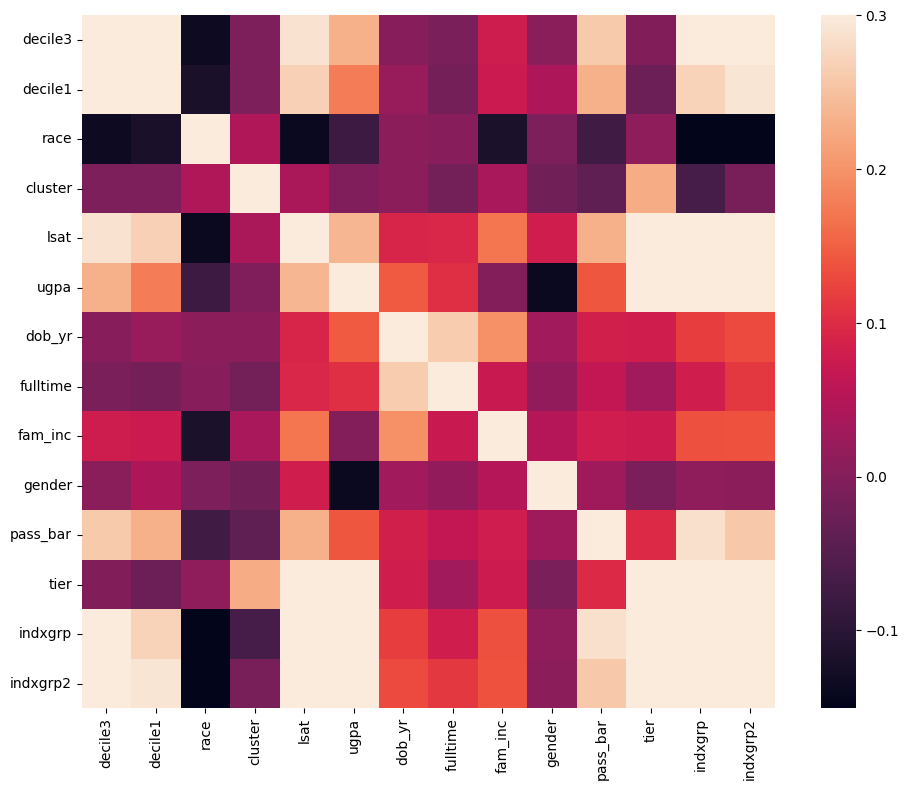

In [169]:
corrmat = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.3, square=True)

In [170]:
df.drop("pass_bar", axis=1).apply(lambda x: (x.corr(df['pass_bar']))).sort_values(ascending=False)

indxgrp     0.287660
decile3     0.260050
indxgrp2    0.258904
lsat        0.232746
decile1     0.231497
ugpa        0.140800
tier        0.096478
dob_yr      0.082264
fam_inc     0.078624
fulltime    0.065156
gender      0.026143
cluster    -0.039469
race       -0.073904
dtype: float64

## Visualization

In [173]:
df.shape

(20798, 14)

pass_bar
1    19758
0     1040
Name: count, dtype: int64


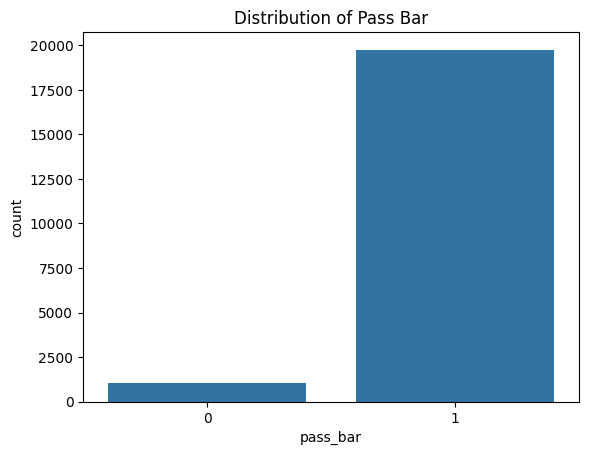

In [174]:
# Distribution of the target variable
print(df['pass_bar'].value_counts())

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='pass_bar', data=df)
plt.title('Distribution of Pass Bar')
plt.show()

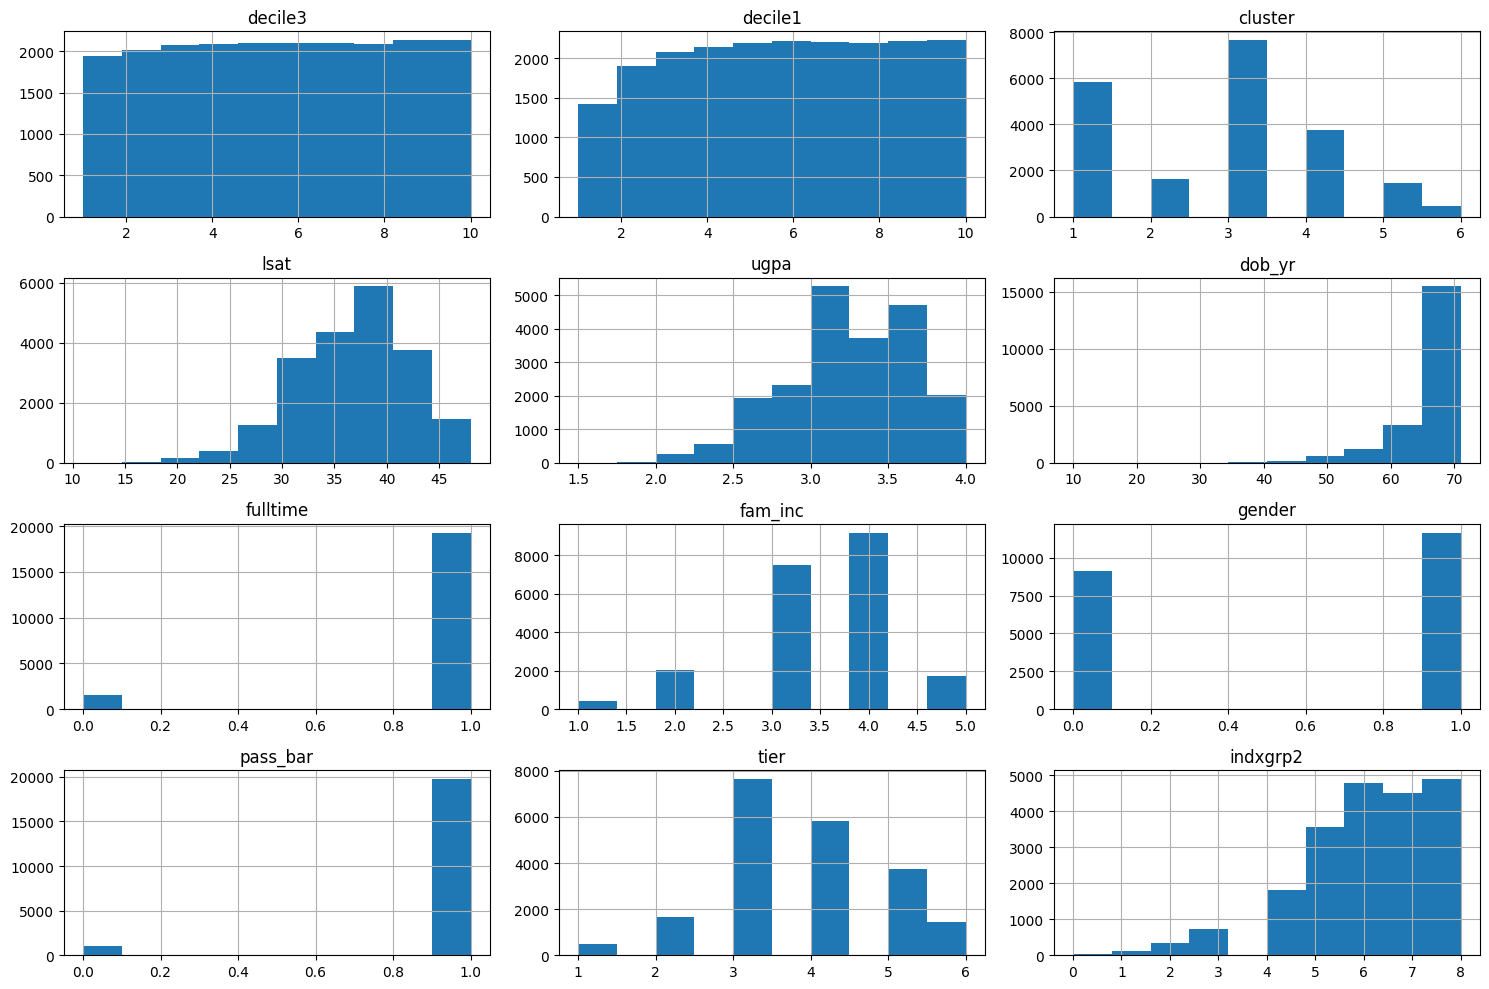

In [175]:
# Histograms for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

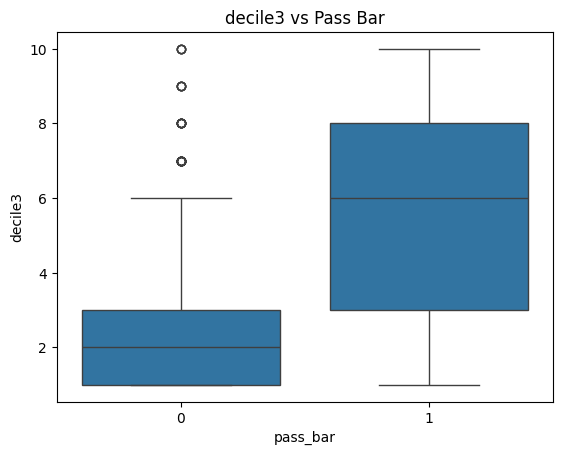

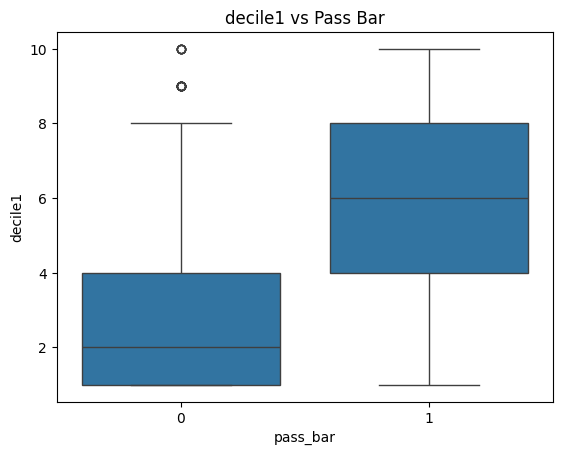

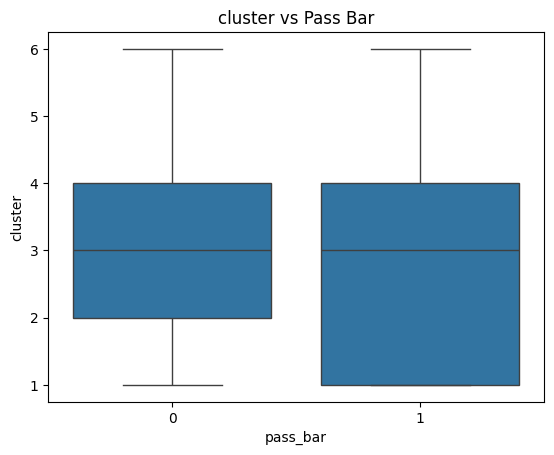

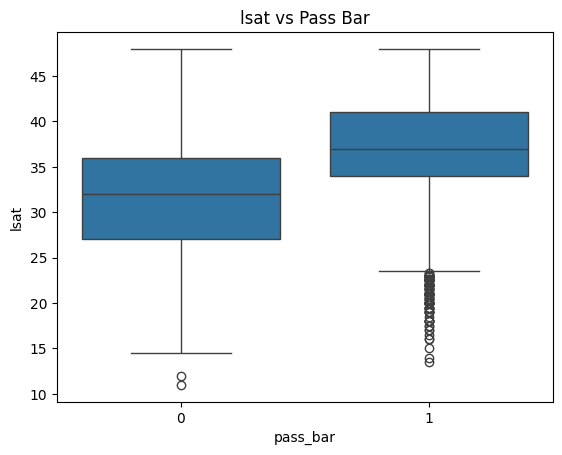

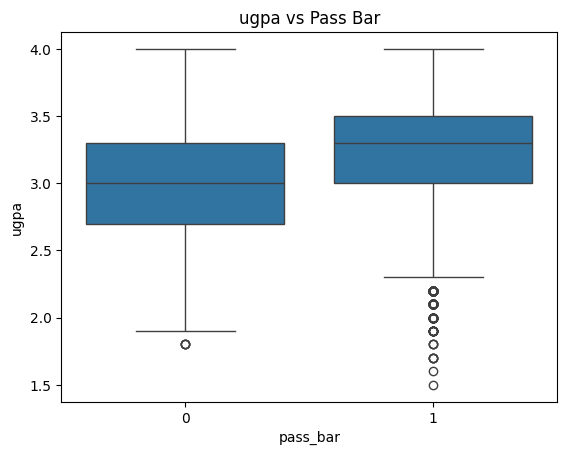

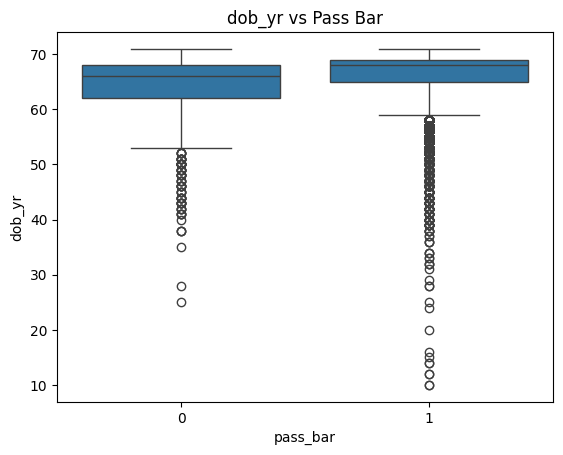

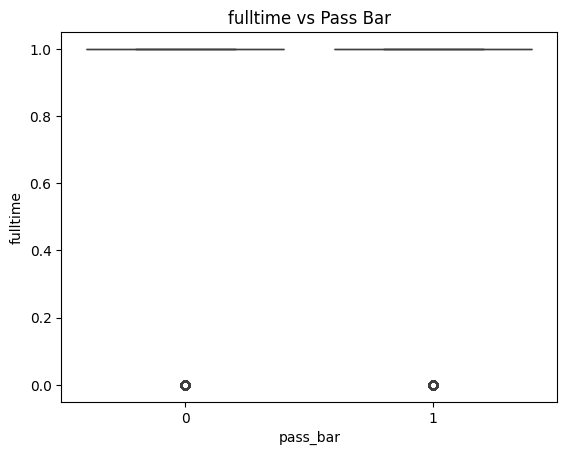

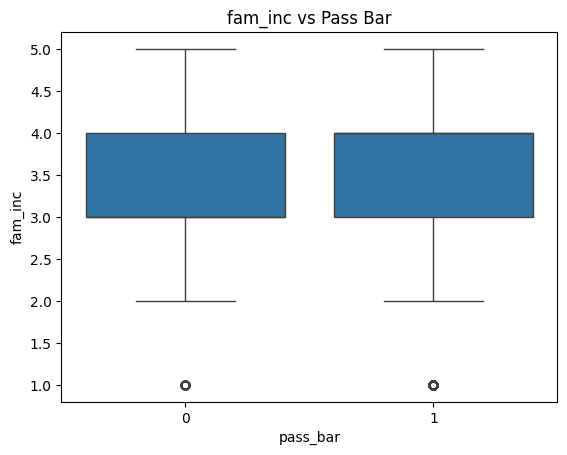

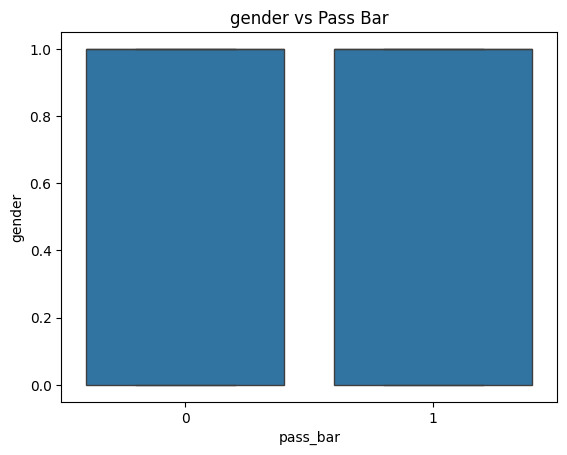

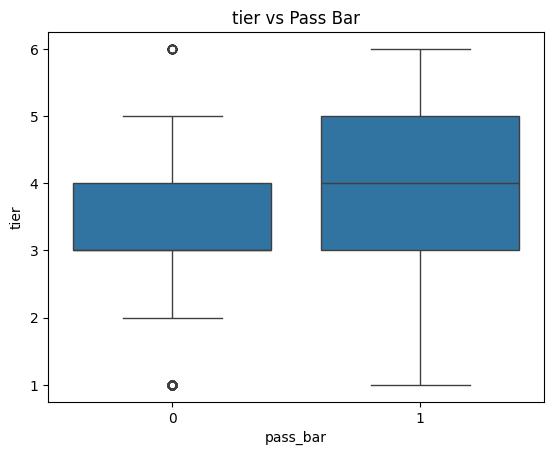

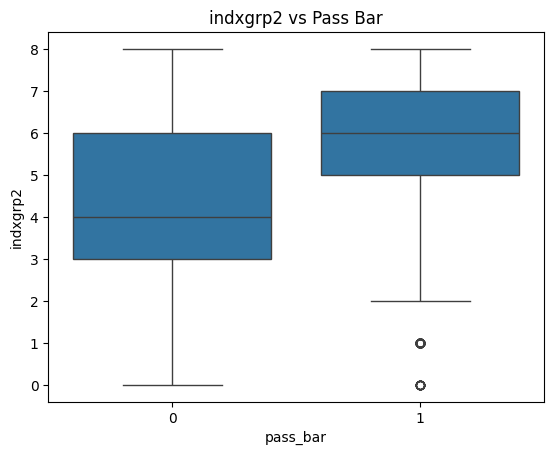

In [176]:
# Box plots for numerical features against the target variable
for col in numerical_cols:
    if col != 'pass_bar':
        sns.boxplot(x='pass_bar', y=col, data=df)
        plt.title(f'{col} vs Pass Bar')
        plt.show()

In [177]:
positive_examples = df[df['pass_bar'] == 1].shape[0]
negative_examples = df[df['pass_bar'] == 0].shape[0]
print(f"Positive examples: {positive_examples}")
print(f"Negative examples: {negative_examples}")

Positive examples: 19758
Negative examples: 1040


In [178]:
print(f"Column count: {df.shape[1]}")

Column count: 14


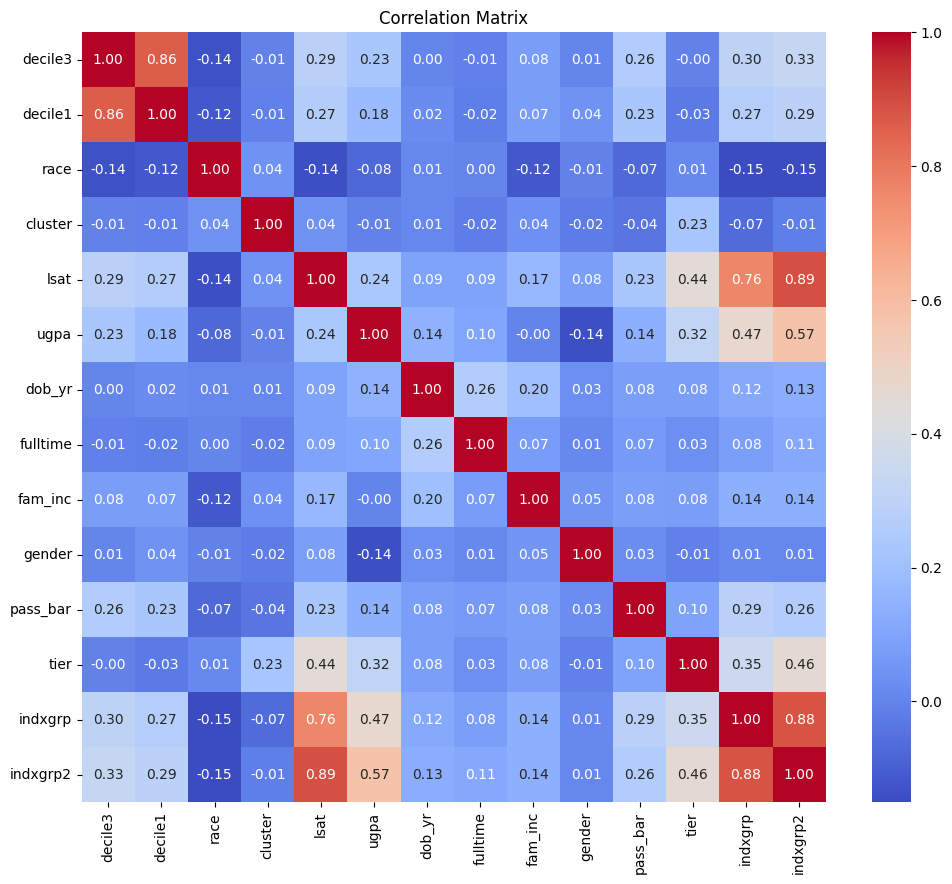

In [179]:
# Correlation matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [180]:
df.to_csv("./data/law_preprocessed.csv", index=False)

- race: 1 race1: 3 race2: 2 other: 1 hisp: 1
- race: 2 race1: 0 race2: 2 asian: 1
- race: 3 race1: 1 race2: 0 black: 1
- race: 4 race1: 2 race2: 2 
- race: 5 race1: 2 race2: 2 
- race: 6 race1: 2 race2: 2 
- race: 7 race1: 4 race2: 1 
- race: 8 race1: 3 race2: 2 other: 1 

Race 1 (race1: 3, race2: 2, hisp: 1, other: 1)

Race Category: Hispanic
Explanation: race1 code 3 combined with hisp: 1 indicates a Hispanic individual.
Race 2 (race1: 0, race2: 2, asian: 1)

Race Category: Asian
Explanation: race1 code 0 with asian: 1 signifies an Asian individual.
Race 3 (race1: 1, race2: 0, black: 1)

Race Category: Black/African American
Explanation: race1 code 1 and black: 1 denote a Black individual.
Races 4, 5, 6 (race1: 2, race2: 2)

Race Category: White
Explanation: race1 code 2 indicates a White individual.
Race 7 (race1: 4, race2: 1)

Race Category: Native American
Explanation: race1 code 4 suggests a Native American individual.
Race 8 (race1: 3, race2: 2, other: 1)

Race Category: Other
Explanation: race1 code 3 with other: 1 indicates an individual who identifies as 'Other'.